## Ridge Regression

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Ridge Regression
class Ridge_Regression() :
      
    def __init__( self, learning_rate, iterations, alpha ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.alpha = alpha
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
      
    
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.alpha * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
    
    
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

In [3]:
#Importing the dataset
df = pd.read_csv('E:\ML\salary_data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
#splitting the data into features and Target
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [7]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [8]:
#Splitting the dataset into training and testing data 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [9]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24, 1) (6, 1) (24,) (6,)


In [10]:
#Model Training 
regressor = Ridge_Regression(learning_rate=0.001, iterations=1000, alpha=1)

In [11]:
#Training the model with training data
regressor.fit(X_train,y_train)

In [12]:
#Predicting the test set
y_pred = regressor.predict(X_test)

In [13]:
print( "Predicted values ", np.round( y_pred[:3], 2 ) )     
print( "Real values      ", y_test[:3] )    
print( "Trained W        ", round( regressor.W[0], 2 ) )    
print( "Trained b        ", round( regressor.b, 2 ) )

Predicted values  [24448.41 22104.37 61953.  ]
Real values       [46205 39343 61111]
Trained W         11720.19
Trained b         9212.17


### Visualizing the Predicted Values

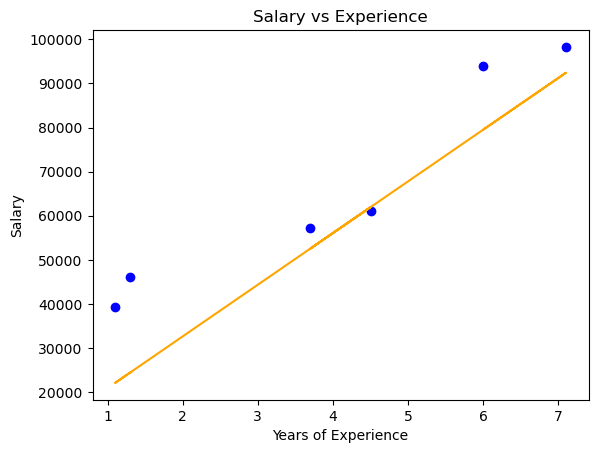

In [14]:
plt.scatter( X_test, y_test, color = 'blue' )    
plt.plot( X_test, y_pred, color = 'orange' )    
plt.title( 'Salary vs Experience' )    
plt.xlabel( 'Years of Experience' )    
plt.ylabel( 'Salary' )    
plt.show()